In [1]:
# 2-1 single-neuron logistic regression code
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

x = np.array([[1,1]])
y = np.array([[0]])

In [14]:
from copy import deepcopy
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def feed_forward(inputs, outputs, weights):
    pre_output = np.dot(inputs, weights[0]) + weights[1]
    output = 1 / (1 + np.exp(-pre_output))
    mean_squared_error = np.mean(np.square(output - outputs))
    return mean_squared_error

def update_weights(inputs, outputs, weights, lr):

    #변경된 가중치가 기존의 가중치에 영향을 주지 않게하기위함.
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = feed_forward(inputs, outputs, original_weights)
    
    # 각 weight에 대한 gradient 계산
    #for loop에서 첫 번째 인덱스만 이용하도록 변경
    for i, weight in enumerate(original_weights):
        for j in range(len(weight)):
            temp_weights[i][j] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss)/(0.0001)
            updated_weights[i][j] -= grad*lr
            temp_weights[i][j] -= 0.0001
    return updated_weights, original_loss

W = [ # W 초기값 설정
    np.array([-0.0053, 0.3793], dtype=np.float32).T,
    np.array([-0.0140], dtype=np.float32),
  ]

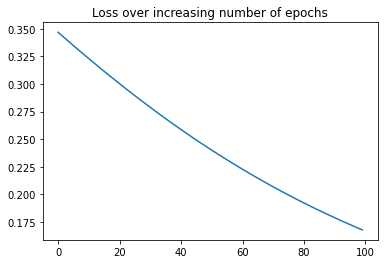

In [15]:
# 100번 update_weights 수행하고 loss plot을 보이는 code 작성. . .
losses = []
for epoch in range(100):
    W, loss = update_weights(x,y,W,0.01)
    losses.append(loss)

plt.plot(losses)
plt.title('Loss over increasing number of epochs')
plt.show()

In [16]:
W # 최종 Weight print

[array([-0.24942285,  0.13519615], dtype=float32),
 array([-0.2581218], dtype=float32)]

In [18]:
# 최종 추청치 output을 print하는 code 작성 . . . 
pre_out = np.dot(x,W[0]) + W[1]
out = 1/(1+np.exp(-pre_out))
out

array([0.40797367])

In [ ]:
감사합니다:)